In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.path as mpltPath
import math
import time
import heapq
from descartes import PolygonPatch
import shapely
from shapely.geometry import Polygon

In [2]:
'''
Creat different type nods

'''
def create_cub(left_top_coodinates, size = 1):
    
    point_1 = np.array(left_top_coodinates)
    point_2 = np.array([left_top_coodinates[0] + size,  left_top_coodinates[1]])
    point_3 = np.array([left_top_coodinates[0] + size,  left_top_coodinates[1] - size])
    point_4 = np.array([left_top_coodinates[0],  left_top_coodinates[1] - size])
    return [point_1,point_2,point_3,point_4]


def create_triangl(left_top_coodinates,rotait= 0 ,size = 1 , type_triangl ='Simpl'):
    point_1 =  np.array(left_top_coodinates)
    
    if type_triangl == 'Simpl':
        
        if rotait == 0:
                
            point_2 = np.array([left_top_coodinates[0] - size/2 , left_top_coodinates[1] - size])
            point_3 = np.array([left_top_coodinates[0] + size/2 , left_top_coodinates[1] - size])    

        
        else:
            
            point_2 = np.array([left_top_coodinates[0] + 1,  left_top_coodinates[1]])
            point_3 = np.array([left_top_coodinates[0] + size/2 , left_top_coodinates[1] - size])
            
            

        
        
        
    if type_triangl == 'Regular':
        if rotait == 0:

            point_2 = np.array([left_top_coodinates[0] + 1,  left_top_coodinates[1]])
            point_3 = np.array([left_top_coodinates[0] + size/2 , left_top_coodinates[1] - math.sin(math.pi / 60)*size])

        else:

            point_2 = np.array([left_top_coodinates[0] - size/2 , left_top_coodinates[1] - math.cos(math.pi / 3)*size])
            point_3 = np.array([left_top_coodinates[0] + size/2 , left_top_coodinates[1] - math.cos(math.pi / 3)*size])
    
    
    return [point_1,point_2,point_3]
        
    
def create_hexagon(left_cordinats, size = 1):
    point_0 = np.array(left_cordinats)
    point_1 = np.array([left_cordinats[0] + size * 0.5 ,left_cordinats[1] + size/2*math.sqrt(3)])
    point_2 = np.array([left_cordinats[0] + size * 1.5 ,left_cordinats[1] + size/2*math.sqrt(3)])
    point_3 = np.array([left_cordinats[0] + size * 2,left_cordinats[1]])
    point_4 = np.array([left_cordinats[0] + size * 1.5 ,left_cordinats[1] - size/2*math.sqrt(3)])
    point_5 = np.array([left_cordinats[0] + size * 0.5 ,left_cordinats[1] - size/2*math.sqrt(3)])
    return  [point_0,point_1,point_2,point_3,point_4,point_5]



In [3]:
def creat_hexagon_field(x_min ,x_max ,y_min,y_max, size = 1  ):

    x_ind = 0
    list_hexagon = []
    size_y = np.arange(y_min,y_max + size,math.sqrt(3)*size)
    size_x = np.arange(x_min,x_max + size,1.5*size)

    for y in size_y:
        for x in size_x:

            if x_ind % 2 == 0: list_hexagon.append(create_hexagon([x,y],size))
            elif x_ind % 2 == 1 : 
                list_hexagon.append(create_hexagon([x ,y + math.sqrt(3)*size/2 ],size))   

            x_ind = x_ind + 1
        x_ind = 0    

    m1  = np.zeros((len(size_y),len(size_x))) + 1
    
    return(list_hexagon,m1)

def creat_triangl_field(x_min ,x_max ,y_min,y_max, size = 1):

    x_ind = 0
    list_triangl = []
    x_arr = np.arange(x_min,x_max+size,size)
    y_arr = np.arange(y_min,y_max+size,size)
    for y in y_arr:
        for x in x_arr:
            list_triangl.append(create_triangl([x,y],0,size))
            list_triangl.append(create_triangl([x,y],1,size)) 

            x_ind += 1

        x_ind = 0


    m1  = np.zeros((len(y_arr),len(x_arr)*2)) + 1
    for x in range(0,m1.shape[1],2): m1[:,x] = m1[:,x] + 1
    
    return(list_triangl,m1)


def creat_cub_field(x_min ,x_max ,y_min,y_max, size = 1):
    x_ind = 0
    list_qube = []
    size_y = np.arange(y_min,y_max + size,size)
    size_x = np.arange(x_min,x_max + size,size)

    for y in size_y:
        for x in size_x:
            list_qube.append(create_cub([x,y],size))
    m1  = np.zeros((len(size_y),len(size_x))) + 1
    
    return(list_qube,m1)

#Checking the occurrence of the generated field in the contour
def create_road_el(list_of_field,in_matrix,path):
    x_ = 0
    y_ = 0
    list_of_elem = []
    matrix_ = in_matrix
    x_lim = matrix_.shape[1] - 1
    
    for elem in list_of_field:
        
        in_val = 0
        inside2 = path.contains_points(elem)
        
        for log_val in inside2:
            
            if log_val == False : in_val += 1
        if in_val == 0: list_of_elem.append(elem)
        else: matrix_[y_,x_] = 0
        
        if x_ >= x_lim :
            x_ = 0
            y_+=1
        else: x_+=1
  
    return(list_of_elem,matrix_)


def get_local_position_in_matrix(pos,matrix):
    return matrix.shape[1]*pos[0] + pos[1]


def last_coodinats(m):
    shape_size = m.shape
    x_lim = shape_size[1] - 1
    y_lim = shape_size[0] - 1
    for y in range(y_lim,0,-1):
        for x in range(x_lim,0,-1):
            if m[y,x] != 0:
                return(y,x)
            
def first_coodinats(m):
    shape_size = m.shape
    x_lim = shape_size[1] - 1
    y_lim = shape_size[0] - 1
    for y in range(y_lim):
        for x in range(x_lim):
            if m[y,x] != 0:
                return(y,x)   

In [4]:
#A* algorytm
#workinbg node
class node:
    def __init__(self,point):
        self.point = point
        self.distance = 0
        self.price = 0
        self.parent = None
        self.G = 0
        self.H = 0
        self.coordynats = 0 

    def __hash__(self):
        return hash(tuple(self.point))

    def __eq__(self, other):
        if not isinstance(other, type(self)): return NotImplemented
        return self.point == other.point
    

def children(point,grid):
    #path to square node, find neighbors
    point_x = point[1]
    point_y = point[0]
    y_lim,x_lim = grid.shape
    links = [d for d in [( point_y , point_x-1),(point_y - 1,point_x),(point_y + 1, point_x),(point_y,point_x+1)]]
    good_links = []
    for link in links: #limits of the neighbor matrix
        if link[0] >= 0 and link[0] <= y_lim - 1 and link[1] >= 0 and link[1] <= x_lim - 1:
            if grid[link[0],link[1]] != 0: good_links.append(link)

    return good_links


def children_tryangl(point,grid):
    ##path to triangl node, find neighbors
    point_x = point[1]
    point_y = point[0]
    y_lim,x_lim = grid.shape
    good_links = []
    
    if (point_x % 2 == 0) and (point_y % 2 == 0) : #orientation of triangles,the triangle looks to the bottom
        
        links = [d for d in [( point_y - 1 , point_x + 1 ), ( point_y - 1 , point_x - 1) ,(point_y,point_x + 1 ),(point_y, point_x - 1)]]
        for link in links: #Лимиты матриц (limits of the neighbor matrix)
            if link[0] >= 0 and link[0] <= y_lim - 1 and link[1] >= 0 and link[1] <= x_lim - 1:
                if grid[link[0],link[1]] != 0: good_links.append(link)
                    
    elif  (point_x % 2 != 0) and (point_y % 2 == 0): #
        links = [d for d in [( point_y +1 , point_x + 1 ),( point_y +1 , point_x - 1 ),(point_y,point_x + 1 ),(point_y, point_x - 1)]]
        for link in links: #Лимиты матриц (limits of the neighbor matrix)
            if link[0] >= 0 and link[0] <= y_lim - 1 and link[1] >= 0 and link[1] <= x_lim - 1:
                if grid[link[0],link[1]] != 0: good_links.append(link)

    elif (point_x % 2 == 0) and (point_y % 2 != 0) : ##orientation of triangles,the triangle looks to the bottom
        links = [d for d in [( point_y - 1 , point_x + 1 ), ( point_y - 1 , point_x - 1) ,(point_y,point_x + 1 ),(point_y, point_x - 1)]]
        
        
        for link in links: #Лимиты матриц(limits of the neighbor matrix)
            if link[0] >= 0 and link[0] <= y_lim - 1 and link[1] >= 0 and link[1] <= x_lim - 1:
                if grid[link[0],link[1]] != 0: good_links.append(link)
                    
    elif  (point_x % 2 != 0) and (point_y % 2 != 0): #
        links = [d for d in [( point_y +1 , point_x + 1 ),( point_y +1 , point_x - 1 ),(point_y,point_x + 1 ),(point_y, point_x - 1)]]
        
        
        
        for link in links: #Лимиты матриц(limits of the neighbor matrix)
            if link[0] >= 0 and link[0] <= y_lim - 1 and link[1] >= 0 and link[1] <= x_lim - 1:
                if grid[link[0],link[1]] != 0: good_links.append(link)


    return good_links



def children_hexagon(point,grid):
    #path to hexagon node, find neighbors
    point_x = point[1]
    point_y = point[0]
    y_lim,x_lim = grid.shape
    if point_x % 2 == 0:
        #There is no +1 +1 on an even one , there is no -1 -1 on an even one, the tiling feature
        links = [d for d in [( point_y , point_x - 1),( point_y + 1 , point_x - 1),
                             ( point_y + 1 , point_x),
                             ( point_y , point_x + 1),( point_y - 1 , point_x + 1),
                             ( point_y - 1  , point_x),( point_y - 1  , point_x - 1)
                            ]]
    else:
        links = [d for d in [( point_y , point_x - 1),
                     ( point_y + 1 , point_x),( point_y + 1, point_x + 1),
                     ( point_y , point_x + 1),( point_y - 1 , point_x + 1),
                     ( point_y - 1  , point_x)
                    ]]
        
    good_links = []
    for link in links: #limits of the neighbor matrix
        if link[0] >= 0 and link[0] <= y_lim - 1 and link[1] >= 0 and link[1] <= x_lim - 1:
            if grid[link[0],link[1]] != 0: good_links.append(link)
                
    return good_links



def distance(point_1,point_2):
    return math.hypot(point_1[0] - point_2[0],point_1[1] - point_2[1])

def min_node(list_node):    
    min_fin_value = 99
    index = 0
    min_ind = 0
    for node in list_node:
        #node_value =  node.H
        node_value =  node.H + node.G
        if min_fin_value > node_value :
            min_fin_value = node_value
            min_ind = index

        index +=1
    return  min_ind  

def aStar(start, goal, grid, type_children = 'q'):
    #The open and closed sets
    openset = []
    closedset = []
    #Current point is the starting point
    current = node(start)
    #Add the starting point to the open set
    openset.append(current)
    #While the open set is not empty
    while openset:
        #Find the item in the open set with the lowest G + H score
        current = openset[min_node(openset)]
        
        #If it is the item we want, retrace the path and return it
        if current.point == goal:
            path = []
            while current.parent:
                path.append(current)
                current = current.parent
            path.append(current)
            return path[::-1]
        #Remove the item from the open set
        openset.remove(current)
        #Add it to the closed set
        if current not in closedset: closedset.append(current)
        
        #Loop through the node's children/siblings        
            #load node-sss
        if type_children == 'q' : list_childrens = children(current.point,grid)
        if type_children == 't' : list_childrens = children_tryangl(current.point,grid)
        if type_children == 'h' : list_childrens = children_hexagon(current.point,grid)
        for node_coordinates in list_childrens:
            
            
            #If it is already in the closed set, skip it
            if any(c.point == node_coordinates for c in closedset):
                
                continue
                
                
            #Otherwise if it is already in the open set
            if any(o.point == node_coordinates for o in openset):
                
                node_ = next(n1 for n1 in openset if n1.point == node_coordinates)
                #Check if we beat the G score 
                new_g = current.G + 1
                #print(node_.G, new_g)
                if node_.G > new_g:
                    #If so, update the node to have a new parent
                    node_.G = new_g
                    node_.parent = current
                    

            else:
                #If it isn't in the open set, calculate the G and H score for the node
                node_ = node(node_coordinates)
                node_.G = current.G + 1
                node_.H = distance(node_.point, goal)
                
                #Set the parent to our current item
                node_.parent = current
                #Add it to the set
                if node_ not in openset: openset.append(node_)
            
    #Throw an exception if there is no path
    raise ValueError('No Path Found') 

In [6]:
#work sample
new_data = pd.read_csv('C:/Users/Savant/Documents/Map_py/clean_data_stol_2020_01.csv',sep = ';', index_col=0)
old_data =  pd.read_csv('C:/Users/Savant/Documents/Map_py/df_full_new.csv',sep = ';', index_col=0)

def simpel_contur(df,rounding = 1,size = 1 , retun_only_index = True ):
    columns_name =  df.columns
    df = df.round(rounding)
    df = df.sort_values(by=[columns_name[1]])
    
    min_y = round(df[columns_name[1]].min()) - 1
    max_y = round(df[columns_name[1]].max()) + 1
    min_x = round(df[columns_name[0]].min()) - 1
    max_x = round(df[columns_name[0]].max()) + 1
    y_step = min_y = round(df[columns_name[1]].min()) - 1
    index_left = []
    index_right = []
    for y in range(min_y , max_y ,size+3 ):
        t_df = df[(df[columns_name[1]] > y_step) & (df[columns_name[1]] <= y)]
        
        if t_df.size > 0:
            index_right.append(t_df[columns_name[0]].idxmax())
            index_left.append(t_df[columns_name[0]].idxmin())
        y_step = y
            
    #if retun_only_index:
        #index_left.extend(index_right)
    return(index_left,index_right)


a1 = old_data[(old_data['X'] > 300) & (old_data['X'] < 400) & (old_data['Y'] < 900) & (old_data['Y'] > 800) ]
i1,i2 = simpel_contur(a1[['X','Y']])
a2 = a1.loc[i1][['X','Y']]
a3 = a1.loc[i2][['X','Y']]
a_f =a2.append(a3[::-1]) 
path = mpltPath.Path(a_f.values)
t1 = a1[['X','Y']]

In [7]:
x_min = 300
y_min = 800
x_max = 350
y_max = 900
path = mpltPath.Path(a_f.values)
print('Тип ','Длина грани ','Количество нодов ','Алг. сложность ','Время ',)
for size in [0.5]:
    list_of_steps = []

    start_time = time.time()
    t_f_0,t_m_0 = creat_triangl_field(x_min ,x_max,y_min,y_max,size)
    t_f_1,t_m_1 = create_road_el(t_f_0,t_m_0,path)
    f_cor = first_coodinats(t_m_1)
    l_cor = last_coodinats(t_m_1)
    flag_tru = 1
    

    scor = 0
    while flag_tru == 1 or scor > 20:
        try:
    
            scor += 1 
            flag_tru =0
            list_of_steps_t = aStar(f_cor,l_cor,t_m_1 , type_children='t')
            

        except ValueError:
            f_cor = (f_cor[0] + 1, f_cor[1] + 1)
            l_cor= (l_cor[0] - 1, l_cor[1] - 1)
            #print(f_cor,l_cor)
            flag_tru =1
            pass


    rez = ['Треуголбник',size,len(t_f_1),len(list_of_steps_t),(time.time() - start_time)]
    print(rez)

Тип  Длина грани  Количество нодов  Алг. сложность  Время 
(4, 51) (196, 115)
(5, 52) (195, 114)
['Треуголбник', 0.5, 9352, 381, 83.7329797744751]


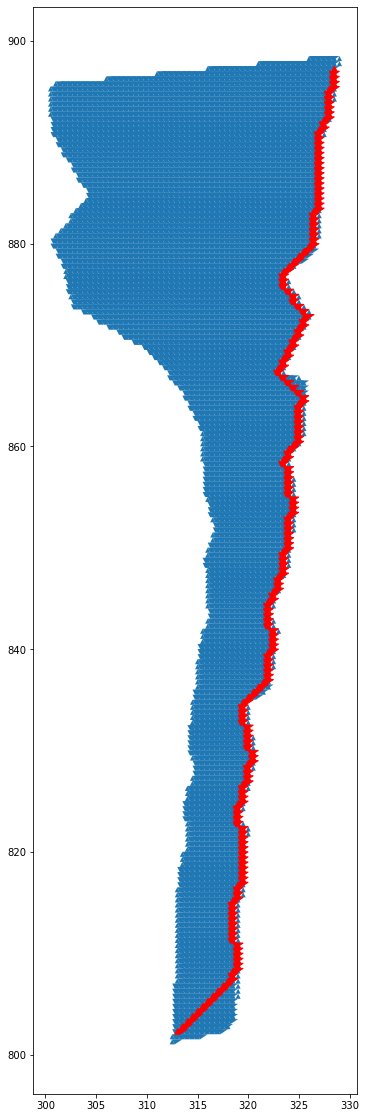

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect("equal")



for x in range(len(t_f_1)):
    
    dreieck = plt.Polygon(t_f_1[x])
    ax.add_patch(dreieck)
    
    
for r in range(len(list_of_steps_t)):
    id_path = get_local_position_in_matrix(list_of_steps_t[r].point,t_m_0)
    dreieck = plt.Polygon(t_f_0[id_path] , color = 'r')  
    ax.add_patch(dreieck)
    

ax.relim()
ax.autoscale_view()
plt.show()